<a href="https://colab.research.google.com/github/DevP-ai/Machine-Learning/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Simple Linear Regression(Dummy Dataset)**

In [1]:
import numpy as np
x=np.array([1,2,3,4,5])
y=np.array([7,14,15,18,19])

In [5]:
x_mean=np.mean(x)
y_mean=np.mean(y)
n=np.size(x)

In [6]:
x_mean,y_mean

(3.0, 14.6)

In [9]:
Sxy=np.sum(x*y)-n*x_mean*y_mean
Sxx=np.sum(x*x)-n*x_mean*x_mean

In [11]:
b1=Sxy/Sxx
b0=y_mean-b1*x_mean
print("Slope b1 is : ",b1)
print("Intercept b0 is: ",b0)

Slope b1 is :  2.8
Intercept b0 is:  6.200000000000001


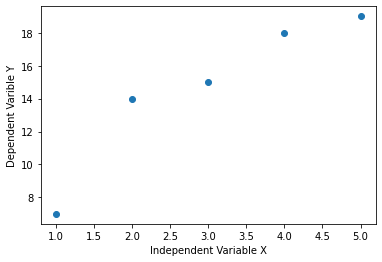

In [14]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.xlabel('Independent Variable X')
plt.ylabel('Dependent Varible Y')
plt.show()

In [17]:
y_pred=b1*x+b0
y_pred

array([ 9. , 11.8, 14.6, 17.4, 20.2])

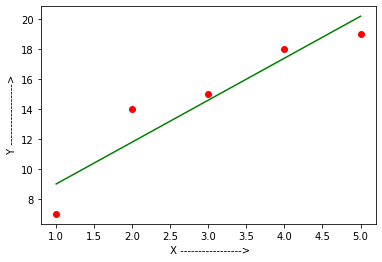

In [21]:
plt.scatter(x,y,c='red')
plt.plot(x,y_pred,c='green')
plt.xlabel(" X ----------------->")
plt.ylabel(" Y ----------------->")
plt.show()

## **Analyze the performance of the model by calculating mean squared error and R2**

In [22]:
error = y - y_pred
se = np.sum(error**2)
print('squared error is', se)
  
mse = se/n 
print('mean squared error is', mse)
  
rmse = np.sqrt(mse)
print('root mean square error is', rmse)
  
SSt = np.sum((y - y_mean)**2)
R2 = 1- (se/SSt)
print('R square is', R2)

squared error is 10.800000000000004
mean squared error is 2.160000000000001
root mean square error is 1.4696938456699071
R square is 0.8789237668161435


## **Use scikit library to confirm the above steps**

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


In [24]:
x=x.reshape(-1,1)
reg=LinearRegression()
reg.fit(x,y)

LinearRegression()

In [25]:
y_predict=reg.predict(x)

In [26]:
mse=mean_squared_error(y,y_predict)
print("MSE: ",mse)

MSE:  2.160000000000001


In [27]:
rmse=np.sqrt(mse)
print("RMSE: ",rmse)

RMSE:  1.4696938456699071


In [30]:
r2=r2_score(y,y_predict)
print("R2_Score: ",r2)

R2_Score:  0.8789237668161435


## **Multiple linear regression**

In [32]:
from sklearn import datasets

In [34]:
df=datasets.load_boston(return_X_y=False)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [46]:
X=df.data
X.shape

(506, 13)

In [47]:
y=df.target
y.shape

(506,)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [52]:
reg=LinearRegression()

In [53]:
reg.fit(X_train,y_train)

LinearRegression()

In [54]:
print("Coefficient: ",reg.coef_)

Coefficient:  [-1.08223557e-01  3.89039349e-02 -1.51517627e-02  3.15897941e+00
 -1.65854070e+01  3.63288486e+00  9.35052187e-03 -1.38618151e+00
  3.24065945e-01 -1.16245167e-02 -1.03644251e+00  1.16127489e-02
 -5.58409340e-01]


In [57]:
#Variance Score: 1 means perfect prediction
print("Variance score : {}".format(reg.score(X_test,y_test)))

Variance score : 0.7789207451814436


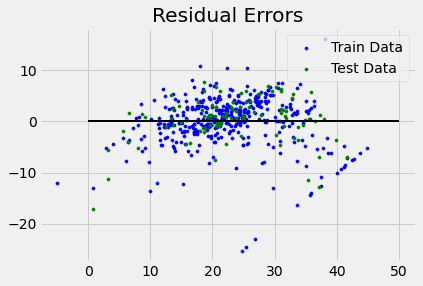

In [59]:
#setting p.ot style
plt.style.use('fivethirtyeight')

# plotting residual errors in training data
plt.scatter(reg.predict(X_train),reg.predict(X_train)-y_train,c='blue',s=10,label='Train Data')

# plotting residual errors in test data
plt.scatter(reg.predict(X_test),reg.predict(X_test)-y_test,c='green',s=10,label="Test Data")

# plotting line for zero residual error
plt.hlines(y=0,xmin=0,xmax=50,linewidth=2)

#plot legend
plt.legend(loc='upper right')

plt.title("Residual Errors")

plt.show()
